# Introduction

A mass on a spring experiences a force described by Hookes law.
For a displacment $x$, the force is
$$F=-kx,$$
where $k$ is the spring constant with units of N/m.

The equation of motion is
$$ F = ma $$
or 
$$ -k x = m a .$$

Because acceleration is the second derivative of displacment, this is
a differential equation,
$$ \frac{d^2}{dt^2} = -\frac{k}{m} x.$$

The solution to this equation is harmonic motion, for example
$$ x(t) = A\sin\omega t,$$
where $A$ is some amplitude and $\omega = \sqrt{k/m}$.
This can be verified by plugging the solution into the differential equation.

The angular frequency $\omega$ is related to the frequency $f$ and the period $T$ by
$$f = \omega/2\pi$$ and $$T=2\pi/\omega$$

We can illustrate this rather trivial case with an interacive plot.

<function __main__.make_plot>

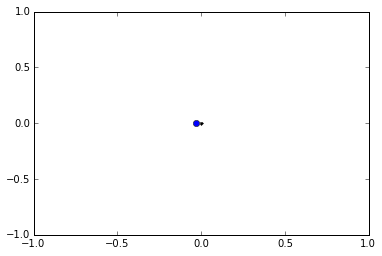

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.html import widgets

def make_plot(t):
    fig, ax = plt.subplots()
    x,y = 0,0
    plt.plot(x, y, 'k.')
    plt.plot(x + 0.3 * t, y, 'bo')
    plt.xlim(-1,1)
    plt.ylim(-1,1)

widgets.interact(make_plot, t=(-1,1,0.1))


We want to generalize this result to several massess connected by several springs.

# The spring constant as a second derivative of potential

The force related to poential energy by
$$ F = -\frac{d}{dx}V(x).$$
Ths equation comes directly from the definition that work is force times distance.

Integrating this, we find the potential energy of a mass on a spring,
$$ V(x) = \frac{1}{2}kx^2. $$
In fact, the spring contant can be defined to be the second derivative of the potential,
$$ k = \frac{d^2}{dx^2} V(x).$$ We take the value of the second derivative at the minimum
of the potential, which assumes that the oscillations are not very far from equilibrium.

We see that Hooke's law is simply
$$F = -\frac{d^2 V(x)}{dx^2} x, $$
where the second derivative is evaluated at the minimum of the potential.

For a general potential, we can write the equation of motion as
$$ \frac{d^2}{dt^2} x = -\frac{1}{m}\frac{d^2V(x)}{dx^2} x.$$

The expression on the right hand side is known as the dynamical matrix, 
though this is a trivial 1x1 matrix.

# Two masses connected by a spring

Now the potential depends on two corrdinates,
$$ V(x_1, x_2) = \frac{1}{2} k (x_1 - x_2 - d),$$
where $d$ is the equilibrium separation of the particles.

Now the force on each particle depends on the positions of both of the particles,
$$
\begin{pmatrix}F_1 \\ F_2\end{pmatrix}
= - 
\begin{pmatrix}
\frac{\partial^2 V}{\partial x_1^2} &
\frac{\partial^2 V}{\partial x_1\partial x_2} \\
\frac{\partial^2 V}{\partial x_1\partial x_2} &
\frac{\partial^2 V}{\partial x_2^2} \\
\end{pmatrix}
\begin{pmatrix}x_1 \\ x_2\end{pmatrix}
$$

For performing the derivatives, we find
$$
\begin{pmatrix}F_1 \\ F_2\end{pmatrix}
= - 
\begin{pmatrix}
k & -k \\
-k & k \\
\end{pmatrix}
\begin{pmatrix}x_1 \\ x_2\end{pmatrix}
$$

The equations of motion are coupled,
$$
\begin{pmatrix}
\frac{d^2x_1}{dt^2} \\
\frac{d^2x_2}{dt^2} \\
\end{pmatrix}
= - 
\begin{pmatrix}
k/m & -k/m \\
-k/m & k/m \\
\end{pmatrix}
\begin{pmatrix}x_1 \\ x_2\end{pmatrix}
$$

To decouple the equations, we find the eigenvalues and eigenvectors.

In [2]:
import numpy as np
a = np.array([[1, -1], [-1, 1]])
freq, vectors = np.linalg.eig(a)
vectors = vectors.transpose()

The frequencies of the two modes of vibration are (in multiples of $\sqrt{k/m}$)

In [3]:
freq

array([ 2.,  0.])

The first mode is a vibrational mode were the masses vibrate against each other (moving in opposite directions). This can be seen from the eigenvector.

In [4]:
vectors[0]

array([ 0.70710678, -0.70710678])

The second mode is a translation mode with zero frequency—both masses move in the same direction.

In [5]:
vectors[1]

array([ 0.70710678,  0.70710678])

We can interactively illustrate the vibrational mode.

<function __main__.make_plot>

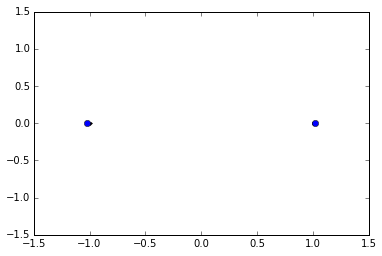

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.html import widgets

def make_plot(t):
    fig, ax = plt.subplots()
    x,y = np.array([-1,1]), np.array([0,0])
    plt.plot(x, y, 'k.')
    plt.plot(x + 0.3 * vectors[0] * t, y, 'bo')
    plt.xlim(-1.5,1.5)
    plt.ylim(-1.5,1.5)

widgets.interact(make_plot, t=(-1,1,0.1))

# Finding the dynamical matrix with numerical derivatives
We start from a function $V(x)$. If we want to calculate a derivative, 
we just use the difference formula but don't take the delta too small.
Using $\delta x = 10^{-6}$ is safe.
$$
F = -\frac{dV(x)}{dx} \approx
\frac{V(x+\Delta x) - V(x-\Delta x)}{2\Delta x}
$$
Note that it is more accurate to do this symmetric difference formula
than it would be to use the usual forward derivative from calculus class.

It's easy to see this formula is just calculating the slope of the function using points near $x$.

In [7]:
def V(x):
    return 0.5 * x**2

deltax = 1e-6

def F_approx(x):
    return ( V(x + deltax) - V(x - deltax) ) / (2 * deltax)

In [8]:
[(x, F_approx(x)) for x in np.linspace(-2,2,9)]

[(-2.0, -2.0000000000575113),
 (-1.5, -1.4999999998766),
 (-1.0, -1.0000000000010001),
 (-0.5, -0.49999999999356115),
 (0.0, 0.0),
 (0.5, 0.49999999999356115),
 (1.0, 1.0000000000010001),
 (1.5, 1.4999999998766),
 (2.0, 2.0000000000575113)]

Next, we can find the second derivative by using the difference formula twice.
We find the nice expression,
$$
\frac{d^2V}{dx^2} \approx \frac{V(x+\Delta x) - 2V(x) + V(x-\Delta x)}{(\Delta x)^2}.
$$

This formula has the nice interpretation of comparing the value of $V(x)$ to
the average of points on either side. If it is equal to the average, the line
is straight and the second derivative is zero.
If average of the outer values is larger than $V(x)$, then the ends curve upward,
and the second derivative is positive.
Likewise, if the average of the outer values is less than $V(x)$, then the ends curve downward,
and the second derivative is negative.

In [9]:
def dV2dx2_approx(x):
    return ( V(x + deltax) - 2 * V(x) + V(x - deltax) ) / deltax**2

In [10]:
[(x, dV2dx2_approx(x)) for x in np.linspace(-2,2,9)]

[(-2.0, 1.0005329897921911),
 (-1.5, 0.99986685597741598),
 (-1.0, 0.99986685597741598),
 (-0.5, 1.0000333894311098),
 (0.0, 1.0),
 (0.5, 1.0000195116433019),
 (1.0, 0.99992236712864724),
 (1.5, 0.99986685597741598),
 (2.0, 1.0005329897921911)]

Now we can use these derivative formulas to calcuate the dynamical matrix 
for the two masses on one spring. Well use $k=1$ and $m=1$ for simplicity.

In [11]:
def V2(x1, x2):
    return 0.5 * (x1 - x2)**2

In [12]:
x1, x2 = -1, 1
mat = np.array(
[[(V2(x1+deltax, x2) - 2 * V2(x1,x2) + V2(x1-deltax, x2)) / deltax**2 ,
  (V2(x1+deltax, x2+deltax) - V2(x1-deltax, x2+deltax) 
   - V2(x1+deltax, x2-deltax) + V2(x1+deltax, x2+deltax)) / (2*deltax)**2],
 [(V2(x1+deltax, x2+deltax) - V2(x1-deltax, x2+deltax) 
   - V2(x1+deltax, x2-deltax) + V2(x1+deltax, x2+deltax)) / (2*deltax)**2,
  (V2(x1, x2+deltax) - 2 * V2(x1,x2) + V2(x1, x2-deltax)) / deltax**2 ]]
)

In [13]:
mat

array([[ 1.0000889 , -0.99986686],
       [-0.99986686,  1.0000889 ]])

In [14]:
freq, vectors = np.linalg.eig(mat)
vectors = vectors.transpose()

In [15]:
for f,v in zip(freq, vectors):
    print("freqency", f, ", eigenvector", v)

freqency 1.99995575656 , eigenvector [ 0.70710678 -0.70710678]
freqency 0.000222044604925 , eigenvector [ 0.70710678  0.70710678]


For practical calcuations, we have to automate this matrix construction for an arbitrary potential.